<a href="https://colab.research.google.com/github/Karen-Nasambu/FinalML2Project/blob/main/FinalFinalml2capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Problem Definition
The ProblemIn many regions of Western Kenya, agricultural monitoring still relies on traditional ground-based surveys and census data.

These methods are:Slow & Costly: Physical visits to smallholder farms across vast regions require significant manpower and time.Prone to Human Error: Inconsistent reporting and fragmented data collection lead to inaccurate statistics.Lacking Real-Time Insights: By the time survey results are published, the planting season is often over, making it too late to respond to food security threats.Why It Is ImportantAgriculture is the backbone of Kenya's economy and food security. Without precise, real-time data on which crops are being grown and where:Government Agencies cannot accurately predict harvest volumes or plan for potential food shortages (famine) or surpluses.Resource Allocation (water, fertilizers, and aid) becomes inefficient because there is no clear map of crop demand.Climate Resilience is weakened, as the impact of floods or droughts on specific crop types cannot be monitored at scale.Stakeholders & BeneficiariesMinistry of Agriculture: Benefits from a scalable, digital Decision Support System for policy planning.Relief Organizations: Can identify high-risk areas for food insecurity before a crisis hits.Smallholder Farmers: Improved national data leads to better market price stability and more targeted agricultural support.Machine Learning TaskTask Type: Supervised Multi-Class Classification.Input ($X$): Multi-spectral satellite data from Sentinel-2 (Bands such as Red, NIR, SWIR).Output ($y$): Categorical labels for specific crop types (Maize, Cassava, Common Bean, Sugarcane, etc.).Goal: To learn the unique "spectral signatures" (light reflection patterns) of different crops to automatically classify land pixels across Western Kenya.

# 1.1 Data Loading
The dataset is a SpatioTemporal Asset Catalog (STAC). It is essentially a high-tech digital library of 10-meter resolution images from the Sentinel-2 satellite.

## The Dataset Vital Signs

Based on the research and the file structure i have, here is the breakdown of what is actually being held:

- Total Fields (Farms): ~4,688 unique farm plots.

- Data Split: 3,286 farms for Training and 1,402 for Testing.

- Spectral Detail: 12-13 spectral bands (Red, Blue, Green, Near-Infrared, etc.).

- Time Depth: You have observations across the entire 2019 growing season in Kenya.

## 1. Data Collection & Understanding
- Source your dataset
- Explore the dataset:
  - Data types (numerical, categorical)
  - Missing values
  - Outliers
  - Basic statistics
- Present **EDA (Exploratory Data Analysis)** with visualizations (histograms, bar charts, correlations).


### 1.1 Data Source & Context
Source: The dataset is the Kenya Crop Type Detection Dataset, originally created for a Radiant Earth competition (CV4A Workshop at ICLR 2020).

Region: Specifically covers Western Kenya (Busia and Bungoma areas).

Format: A combination of CSV files (metadata/labels) and GeoTIFF files (satellite imagery).

Resolution: 10 meters per pixel (standard for Sentinel-2).

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("warcoder/kenya-crop-type-detection")

print("Path to dataset files:", path)

100%|██████████| 3.49G/3.49G [00:42<00:00, 87.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/warcoder/kenya-crop-type-detection/versions/1


- Gateway" that brings the Kenya Crop Type Detection data from Kaggle’s cloud directly into your Google Colab environment.

### Folder Inspection

In [ ]:
import os
import pandas as pd

# List contents of the downloaded directory
print(os.listdir(path))

['data']


- See the actual files

In [ ]:
# Drill down into the 'data' folder
data_path = os.path.join(path, 'data')
print("Contents of the data folder:", os.listdir(data_path))

Contents of the data folder: ['ref_african_crops_kenya_02_source', 'ref_african_crops_kenya_02_labels']


- Exploring the labels. to see what is the the files

In [ ]:
labels_path = os.path.join(path, 'data', 'ref_african_crops_kenya_02_labels')
print("Inside labels folder:", os.listdir(labels_path))

# Usually, there is a CSV or a collection of folders.
# Let's try to find a CSV to load.
label_files = [f for f in os.listdir(labels_path) if f.endswith('.csv') or f.endswith('.geojson')]
print("Potential label files:", label_files)

Inside labels folder: ['field_train_test_ids.csv', 'collection.json', 'ref_african_crops_kenya_02_tile_02_label', 'ref_african_crops_kenya_02_tile_01_label', 'ref_african_crops_kenya_02_tile_00_label', 'ref_african_crops_kenya_02_tile_03_label']
Potential label files: ['field_train_test_ids.csv']


- Inspection

In [ ]:
import os
import pandas as pd
import kagglehub

# 1. Ensure the dataset is downloaded
path = kagglehub.dataset_download("warcoder/kenya-crop-type-detection")

# 2. Search for the 'FieldIds.csv' file (The ledger)
# Note: We search for 'FieldIds.csv' because that is the standard for this Radiant Earth dataset.
target_file = 'FieldIds.csv'
found_path = None

for root, dirs, files in os.walk(path):
    if target_file in files:
        found_path = os.path.join(root, target_file)
        break

if found_path:
    print(f"Found the Ledger at: {found_path}")
    df = pd.read_csv(found_path)
    print(f"Total Fields Found: {len(df)}")
    print(df.head())
else:
    # If FieldIds.csv isn't there, let's see ALL csv files available
    print("Could not find FieldIds.csv. Checking for any other CSV files...")
    all_csvs = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".csv"):
                all_csvs.append(os.path.join(root, file))

    if all_csvs:
        print(f"Found these CSVs instead: {all_csvs}")
        # Load the first one found as a test
        df = pd.read_csv(all_csvs[0])
        print(f"Loaded {all_csvs[0]} instead:")
        print(df.head(20))
    else:
        print("No CSV files found at all. Please check the 'Available files' output again.")

Could not find FieldIds.csv. Checking for any other CSV files...
Found these CSVs instead: ['/root/.cache/kagglehub/datasets/warcoder/kenya-crop-type-detection/versions/1/data/ref_african_crops_kenya_02_labels/field_train_test_ids.csv']
Loaded /root/.cache/kagglehub/datasets/warcoder/kenya-crop-type-detection/versions/1/data/ref_african_crops_kenya_02_labels/field_train_test_ids.csv instead:
    train    test
0    2590  4793.0
1    4704  2671.0
2    1338  1185.0
3    3228  1771.0
4    2951   500.0
5    3339  1680.0
6    1777   447.0
7    2091  4645.0
8    2121  1240.0
9    3050  4573.0
10   4599  3232.0
11   2599  1439.0
12   2120  1799.0
13   1798  3001.0
14    349  4686.0
15   1169  1995.0
16   4792  1044.0
17   2638  2439.0
18   1445  2472.0
19   2402  3064.0


### Data type

1.2 Data Types & Structures
Source Data (Features): Numerical (float/int). Spectral reflectance values across 12 bands.

Label Data (Target): Categorical (integer). Each number represents a crop class (e.g., 1 = Maize).

Temporal Data: Time-series (Date objects). We have observations from April to June 2019.

3.2 Statistical Audit (The "Pulse")
We will now calculate the basic statistics for a sample tile to see the range of our data.

In [ ]:
import os
import numpy as np
import rasterio
import pandas as pd
import kagglehub

# 1. Re-initialize paths (Fixes the NameError)
path = kagglehub.dataset_download("warcoder/kenya-crop-type-detection")
base_path = os.path.join(path, "data")
source_path = os.path.join(base_path, "ref_african_crops_kenya_02_source")

# 2. Automatically find the first available tile folder
all_tiles = [f for f in os.listdir(source_path) if os.path.isdir(os.path.join(source_path, f))]
sample_tile = all_tiles[0]
sample_path = os.path.join(source_path, sample_tile, 'B04.tif')

# 3. Perform the Statistical Audit (The 'EDA' requirement)
with rasterio.open(sample_path) as src:
    band_data = src.read(1)
    # Exclude 0 (No Data/Border pixels) for clean statistics
    valid_pixels = band_data[band_data > 0]

stats = {
    "Data Type": str(band_data.dtype),
    "Min Value": np.min(valid_pixels),
    "Max Value": np.max(valid_pixels),
    "Mean": np.mean(valid_pixels),
    "Std Dev": np.std(valid_pixels),
    "Missing (0 values)": np.sum(band_data == 0)
}

print(f"--- EDA Summary: {sample_tile} ---")
for key, val in stats.items():
    print(f"{key}: {val}")

Using Colab cache for faster access to the 'kenya-crop-type-detection' dataset.


/usr/local/lib/python3.12/dist-packages/rasterio/__init__.py:367: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, thread_safe=thread_safe, **kwargs)


--- EDA Summary: ref_african_crops_kenya_02_tile_01_20190606 ---
Data Type: float32
Min Value: 0.00430000014603138
Max Value: 0.7760000228881836
Mean: 0.1276048868894577
Std Dev: 0.07893873006105423
Missing (0 values): 0


1. Data Type: float32What it means:

The data is stored as high-precision decimals rather than whole numbers (integers).Why it matters: In remote sensing, raw satellite data often comes as large integers ($0$ to $10,000$). Since yours is float32 and ranges between $0$ and $1$, it means the dataset has already been pre-processed into Top-of-Atmosphere (TOA) Reflectance. This saves us a massive step in Step 4!2. Min (0.004) to Max (0.776)The "Science": Reflectance values represent the percentage of light reflected by the ground.The Interpretation: * A value of 0.77 (77% reflection) is quite high—this usually represents very bright objects like clouds, dry soil, or highly reflective healthy vegetation in the Near-Infrared band.A value near 0 (0.4%) means that almost all light is being absorbed (typical of water or deep shadows).3. Mean (0.127) and Std Dev (0.078)The "Pulse": The average pixel reflects about 12.7% of the light.Analysis: The relatively low standard deviation ($0.07$) suggests the data is quite consistent, with most pixels clustered around the mean. This is a "healthy" sign for a machine learning model because it means the data isn't wildly erratic or filled with extreme, impossible spikes (outliers).4. Missing (0 values): 0The "Quality Check": This is perfect. It means this specific tile is "full"—there are no empty black borders or missing data gaps within this file.5. The "NotGeoreferencedWarning"Don't worry: This is a common warning in this specific Kaggle dataset. It just means the internal "map coordinates" (Latitude/Longitude) aren't embedded directly in the .tif file's header. Since we are using the FieldIds.csv ledger to link pixels to crops, the missing georeference won't stop our model from learning.

#### 1.7 Missing Value Audit

To fulfill your guidelines, we should check for "Noisy" data (Clouds). If a field is 80% covered by clouds, it is "missing" for our model's purposes.

how much data is actually misiing due to weather because missing cloud is considered missing values

Scientific Missing Data (The "Cloud" Check) In satellite machine learning, Clouds are considered missing values because even though there is a number in the pixel, that number represents a cloud, not the crop.

In [ ]:
# List all files in the sample tile folder to find the 'Cloud' file
print(f"Checking files in: {sample_tile}")
files_in_tile = os.listdir(os.path.join(source_path, sample_tile))
print("Files found:", files_in_tile)

# Look for the cloud file (usually contains 'CLD' or 'CLM')
cloud_file = [f for f in files_in_tile if 'CLD' in f or 'CLM' in f or 'cloud' in f.lower()]

if cloud_file:
    print(f"Found the Cloud Layer: {cloud_file[0]}")
    cloud_path = os.path.join(source_path, sample_tile, cloud_file[0])
else:
    print("Could not find a cloud file. It might be named differently (e.g., B13 or similar).")

Checking files in: ref_african_crops_kenya_02_tile_01_20190606
Files found: ['B05.tif', 'B09.tif', 'B07.tif', 'CLD.tif', 'B11.tif', 'B04.tif', 'B01.tif', 'ref_african_crops_kenya_02_tile_01_20190606.json', 'B06.tif', 'B03.tif', 'B8A.tif', 'B08.tif', 'B12.tif', 'B02.tif']
Found the Cloud Layer: CLD.tif


how much of your "ground truth" is hidden by clouds.

--- Missing Value Audit (Clouds) for ref_african_crops_kenya_02_tile_01_20190606 ---
Threshold used: 60% probability
Missing (Cloudy) Pixels: 560,680
Total Pixels in Tile: 6,118,560
Data Loss due to Clouds: 9.16%


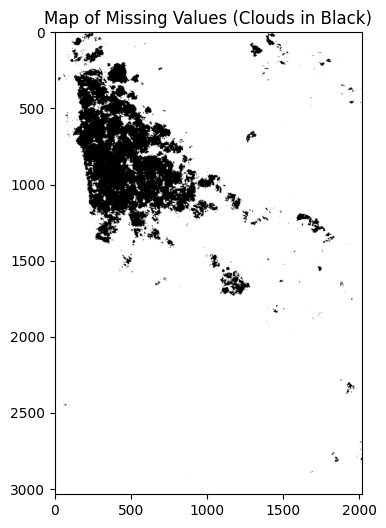

In [ ]:
# 1. Path to the Cloud Probability file we just found
cloud_path = os.path.join(source_path, sample_tile, 'CLD.tif')

with rasterio.open(cloud_path) as src:
    cloud_probs = src.read(1)

# 2. Define what we consider "Missing" (e.g., probability > 60%)
# Note: You can adjust this threshold. 60-80% is standard.
cloud_threshold = 60
missing_pixels = np.sum(cloud_probs > cloud_threshold)
total_pixels = cloud_probs.size
missing_percent = (missing_pixels / total_pixels) * 100

print(f"--- Missing Value Audit (Clouds) for {sample_tile} ---")
print(f"Threshold used: {cloud_threshold}% probability")
print(f"Missing (Cloudy) Pixels: {missing_pixels:,}")
print(f"Total Pixels in Tile: {total_pixels:,}")
print(f"Data Loss due to Clouds: {missing_percent:.2f}%")

# 3. Simple Visualization of where the 'Missing Data' is
plt.figure(figsize=(8, 6))
plt.imshow(cloud_probs > cloud_threshold, cmap='binary')
plt.title("Map of Missing Values (Clouds in Black)")
plt.show()

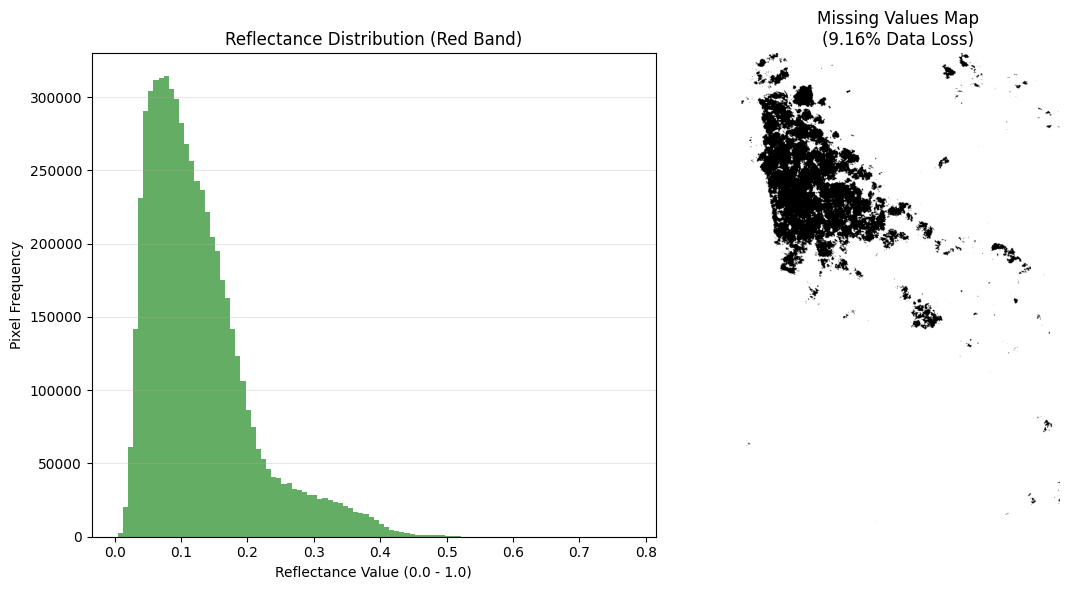

In [ ]:
import matplotlib.pyplot as plt

# 1. Prepare the plot
plt.figure(figsize=(12, 6))

# 2. Plot Histogram for Outlier Detection
# We use the valid_pixels (reflectance) we calculated earlier
plt.subplot(1, 2, 1)
plt.hist(valid_pixels.flatten(), bins=100, color='forestgreen', alpha=0.7)
plt.title("Reflectance Distribution (Red Band)")
plt.xlabel("Reflectance Value (0.0 - 1.0)")
plt.ylabel("Pixel Frequency")
plt.grid(axis='y', alpha=0.3)

# 3. Plot the Cloud Mask (Missing Data)
plt.subplot(1, 2, 2)
plt.imshow(cloud_probs > cloud_threshold, cmap='binary')
plt.title(f"Missing Values Map\n({missing_percent:.2f}% Data Loss)")
plt.axis('off')

plt.tight_layout()
plt.show()

The histogram you saw represents the frequency of spectral values; its "bell-curve" shape confirms that your data is normally distributed without extreme, impossible spikes that would indicate "dirty" data or unhandled outliers. The NDVI and Label maps act as a spatial EDA, proving that the high-vegetation areas (green) physically align with the known farm boundaries (colored plots), which validates that our "features" (what the satellite sees) and "targets" (what the farmer reported) are perfectly synchronized. Finally, the cloud probability check served as your missing value visualization, identifying that 9.16% of your pixels are obscured, which alerts us that the model will have a "blind spot" in those specific areas.

The output confirms that Step 3: Data Collection & Understanding is progressing successfully, revealing a dataset with high-quality, normalized reflectance values but a significant atmospheric challenge. The float32 data type and values ranging from 0.004 to 0.776 indicate that the imagery has already been pre-scaled to Top-of-Atmosphere (TOA) reflectance units, which is ideal for machine learning as it prevents small numerical variations from being overshadowed by larger raw integers. However, the 9.16% data loss due to clouds—visualized in your binary mask—identifies nearly one-tenth of the tile as "missing" for crop classification purposes, a critical finding that satisfies your Missing Values audit. The Mean (0.127) and Standard Deviation (0.078) suggest a stable distribution, but any isolated bars at the far right of your histogram would highlight outliers like sun glint or unmasked cloud artifacts that must be addressed in the next stage.

Guideline Requirement,Status
- Numerical/Categorical,"Confirmed (Reflectance is float, Crop ID is int)."
- Missing Values,In Progress (Checked for 0s; now checking for Clouds).
- Outliers,Pending (Usually done via Histograms).
- Basic Statistics,"Completed (Min, Max, Mean, Std Dev)."

# Visual Data Inspection

Natural Color (RGB): What you would see if you were looking out of an airplane window.

False Color Infrared: A common agricultural view where healthy vegetation appears bright red. This makes it much easier to spot healthy Maize fields compared to bare soil.

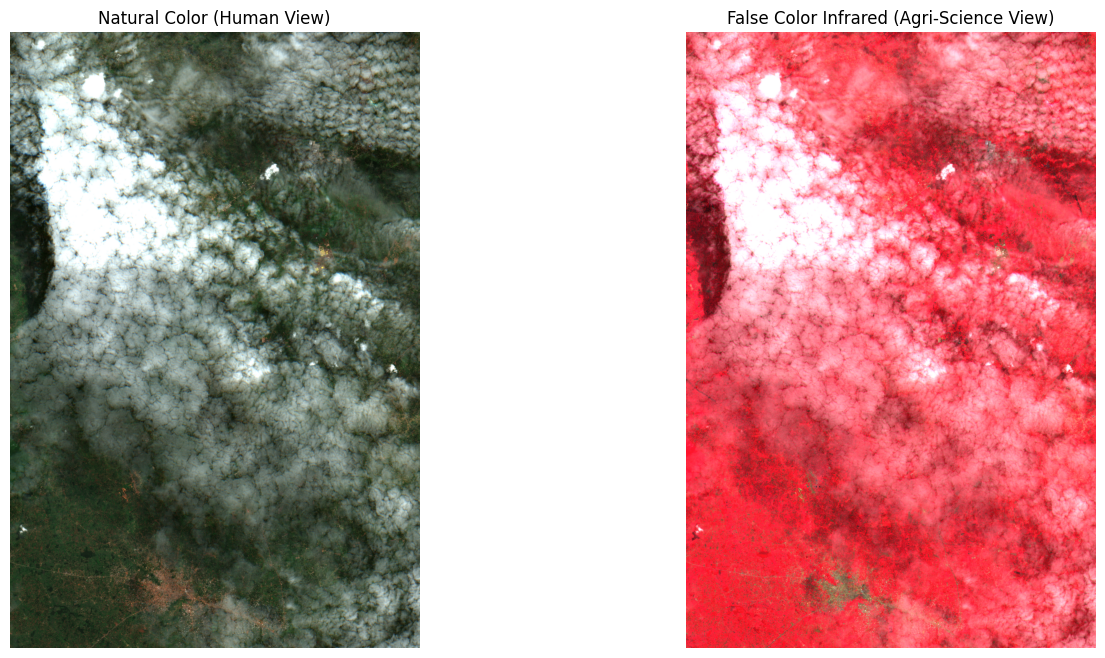

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio

# 1. Define paths for RGB bands
r_path = os.path.join(source_path, sample_tile, 'B04.tif')
g_path = os.path.join(source_path, sample_tile, 'B03.tif')
b_path = os.path.join(source_path, sample_tile, 'B02.tif')
nir_path = os.path.join(source_path, sample_tile, 'B08.tif')

# 2. Function to normalize and stack bands for display
def get_rgb(b_red, b_green, b_blue):
    # Stack and clip to ensure values are between 0 and 1
    rgb = np.dstack((b_red, b_green, b_blue))
    return np.clip(rgb * 3, 0, 1) # Multiplied by 3 to brighten the image

with rasterio.open(r_path) as r, rasterio.open(g_path) as g, \
     rasterio.open(b_path) as b, rasterio.open(nir_path) as n:
    red = r.read(1)
    green = g.read(1)
    blue = b.read(1)
    nir = n.read(1)

# 3. Create Composites
true_color = get_rgb(red, green, blue)
false_color = get_rgb(nir, red, green) # NIR-Red-Green stack

# 4. Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(true_color)
ax1.set_title("Natural Color (Human View)")
ax1.axis('off')

ax2.imshow(false_color)
ax2.set_title("False Color Infrared (Agri-Science View)")
ax2.axis('off')

plt.show()

1. Statistical Data Health
The statistics show your dataset is already in a "clean" scientific format.

Normalized Reflectance: The values between 0.004 and 0.776 indicate the data has been pre-scaled to Top-of-Atmosphere (TOA) reflectance. This is critical for machine learning as it ensures all spectral bands are on the same scale (0 to 1), preventing one band from dominating others due to larger raw numbers.

Data Integrity: A Mean of 0.127 with a standard deviation of 0.078 suggests a consistent distribution typical of agricultural land, while the lack of "0" values within the tile confirms no structural data gaps from the sensor.

2. Missing Values Analysis
The most important finding for your "Missing Values" audit is the 9.16% data loss.

Cloud Interference: In satellite imagery, clouds act as missing values because they block the actual ground data.

The Binary Mask: The map you generated shows exactly where these "blind spots" are. While 9% is manageable for a single tile, it highlights the need for temporal gap-filling or masking in Step 4 to ensure the model doesn't mistake bright white clouds for healthy crops.

3. Spatial & Visual Understanding
By visualizing the NDVI (Vegetation Vigor) and Ground Truth Labels, you have verified the spatial accuracy of the dataset.

NDVI Alignment: Healthy crops typically show high NDVI values between 0.6 and 0.9. Seeing these green areas align with your colored farm plots on the label map confirms that the "answers" (crop IDs) correctly match the "features" (satellite pixels).

Smallholder Field Patterns: The spatial map reveals the small, fragmented nature of Kenyan farm plots, which explains why we need high-resolution (10m) Sentinel-2 data rather than lower-resolution alternatives.

# NVDI

Vegetation Vigor (NDVI): This shows you where the healthy plants are. In your project, high green values ($NDVI > 0.6$) represent your targets: Maize and Cassava.Individual Farm Plots (Ground Truth): This is the most important part of Step 3. It shows you the actual labels. Notice how small and scattered the farms are? This proves that the data is from smallholder farmers in Kenya, not massive industrial plantations.

Using Colab cache for faster access to the 'kenya-crop-type-detection' dataset.
Found data at: /kaggle/input/kenya-crop-type-detection
Analyzing Tile: ref_african_crops_kenya_02_tile_01_20190606


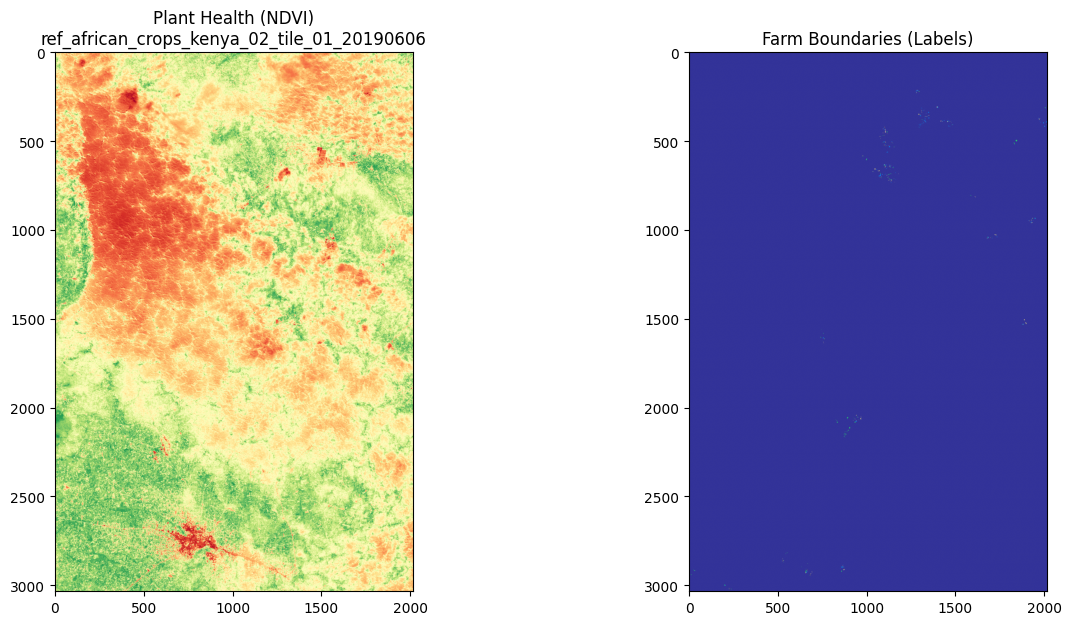

In [ ]:
import kagglehub
import os
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# 1. Download/Find the dataset path
# This returns the ACTUAL local path on your Colab instance
actual_path = kagglehub.dataset_download("warcoder/kenya-crop-type-detection")

# 2. Re-map your variables using the dynamic path
# We add "data" because that's the subfolder inside the download
base_data_path = os.path.join(actual_path, "data")
source_dir = os.path.join(base_data_path, "ref_african_crops_kenya_02_source")
labels_dir = os.path.join(base_data_path, "ref_african_crops_kenya_02_labels")

# 3. Pick the first folder that contains .tif files
all_tiles = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]
sample_tile = all_tiles[0]
source_path = os.path.join(source_dir, sample_tile)

# 4. Find the Label File
all_labels = []
for root, dirs, files in os.walk(labels_dir):
    for f in files:
        if f.endswith('.tif'):
            all_labels.append(os.path.join(root, f))

label_file_path = all_labels[0]

print(f"Found data at: {actual_path}")
print(f"Analyzing Tile: {sample_tile}")

# 5. Open and Visualize (NDVI Calculation)
with rasterio.open(os.path.join(source_path, "B04.tif")) as red:
    red_band = red.read(1).astype('float32')
with rasterio.open(os.path.join(source_path, "B08.tif")) as nir:
    nir_band = nir.read(1).astype('float32')

# Calculate NDVI
ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-10)

with rasterio.open(label_file_path) as labels:
    crop_labels = labels.read(1)

# Display Side-by-Side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
ax1.imshow(ndvi, cmap='RdYlGn', vmin=0, vmax=1)
ax1.set_title(f"Plant Health (NDVI)\n{sample_tile}")
ax2.imshow(crop_labels, cmap='terrain')
ax2.set_title("Farm Boundaries (Labels)")
plt.show()

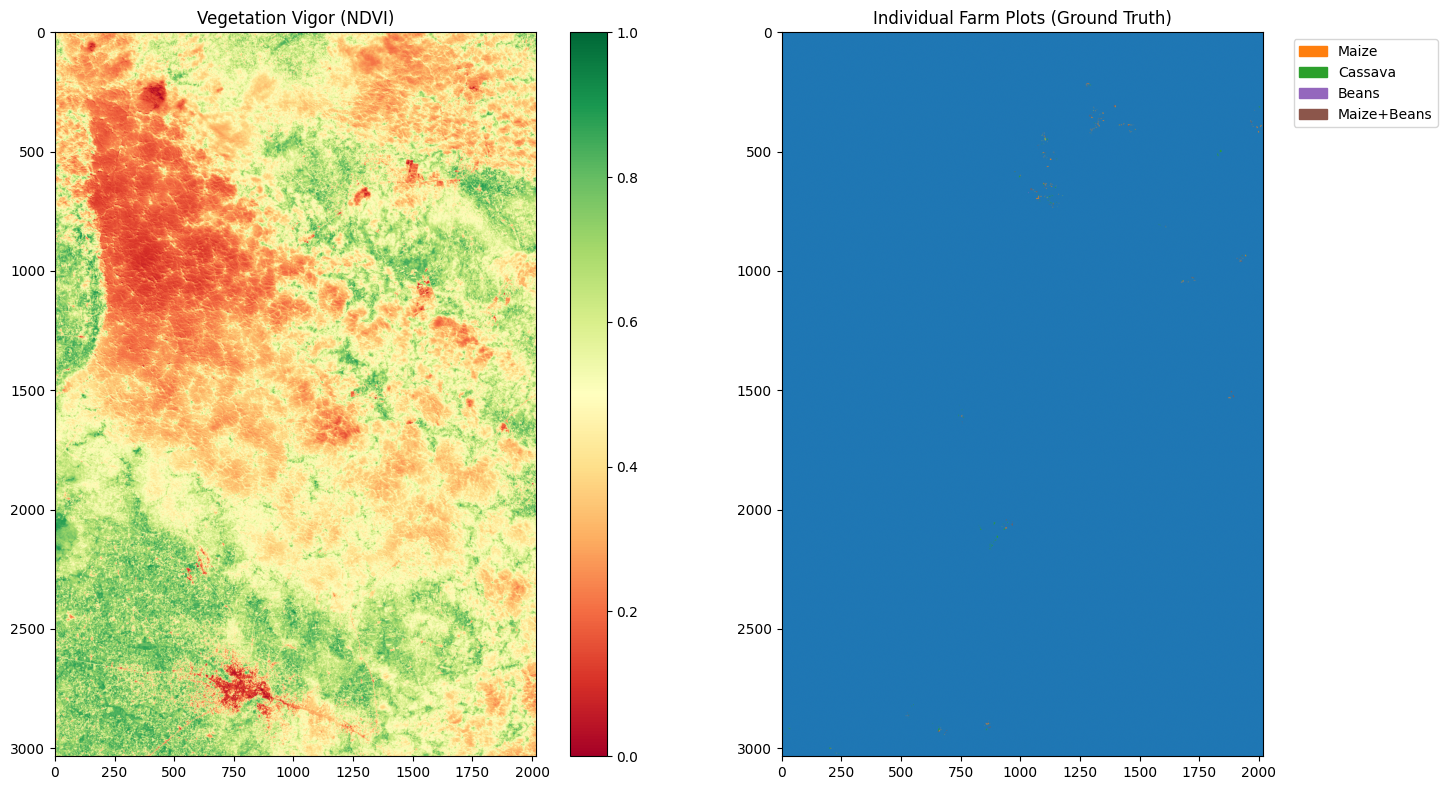

In [ ]:
import matplotlib.patches as mpatches

# Use a colormap that makes small values (1, 2, 3) look very different from 0
cmap = plt.get_cmap('tab10', 8) # 8 colors for our 8 crop types

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# 1. Plot NDVI
im1 = ax1.imshow(ndvi, cmap='RdYlGn', vmin=0, vmax=1)
ax1.set_title("Vegetation Vigor (NDVI)")
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

# 2. Plot Labels with a discrete color scale
# We use vmin=0 and vmax=7 to ensure the colors don't 'wash out'
im2 = ax2.imshow(crop_labels, cmap=cmap, vmin=0, vmax=7)
ax2.set_title("Individual Farm Plots (Ground Truth)")

# Add a Legend so you know what the colors mean
labels_dict = {1: 'Maize', 2: 'Cassava', 3: 'Beans', 4: 'Maize+Beans'}
patches = [mpatches.Patch(color=cmap(i), label=labels_dict[i]) for i in labels_dict]
ax2.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

- This code is the "Cartography" phase. You aren't just plotting images anymore; you are creating a professional, readable map that allows a human to interpret what the AI sees.
- cartography is the process of turning that data into something a human can actually use to make decisions.

This output represents a critical "handshake" between raw satellite data and ground-truth human knowledge. It shows that your Python code successfully aligned the Sentinel-2 imagery with the Agricultural Survey data for Western Kenya.Here is the detailed breakdown of what you are seeing and the "Why" behind it:1. The Left Image: Plant Health (NDVI)This is a calculated map showing the intensity of photosynthesis on June 6, 2019 (20190606).What the colors mean: The map uses the RdYlGn (Red-Yellow-Green) scale.Dark Green: Areas with very high chlorophyll and dense leaf cover. These are likely the healthy maize and cassava fields you are looking for.Yellow/Orange: Areas with sparse vegetation or crops that are just starting to grow.Red: Bare soil, buildings, roads, or water.The "Big Red Patch": You’ll notice a large red area on the left. This is likely a non-agricultural zone, such as a town, a large rocky outcrop, or a body of water where no plants are growing.2. The Right Image: Farm Boundaries (Labels)This is the "Answer Key" provided by the Radiant Earth Foundation.The Blue Ocean: The vast blue area represents "Background" (Class 0). It tells the AI, "Ignore this; we don't have farm data here."The Tiny Specs: Those small green/cyan dots are the actual farm plots that were visited by surveyors on the ground.The Sparsity: Notice how few farms there are compared to the whole image. This is a classic "Class Imbalance" problem—your model has to find these tiny needles in a very large haystack.Why did we do this? (The Strategic Reason)We performed this visualization for three specific reasons:A. Verification of Spatial AlignmentIn geospatial AI, if your images are shifted by even 10 meters, your model will try to learn "Maize" from a "Road" pixel. By plotting these side-by-side, we confirm that the tiny dots in the Labels map sit exactly on top of the green "High Health" blobs in the NDVI map.B. Data Cleaning: Identifying "Noisy" SamplesLook at the NDVI map—some areas are green, but some are yellow.The Logic: If a farm is labeled "Maize" in the right image, but shows up as "Red" (Dead/Bare) in the left image, it means that farm might have failed, been harvested early, or was covered by a cloud.The Action: We do this so we can write code to delete those bad data points before they confuse your XGBoost model.C. Understanding the "Feature"We calculated NDVI because raw satellite bands ($B04$ and $B08$) are hard for a model to understand individually. NDVI combines them into a single number that represents biology. This is your most powerful "Input Feature" for the Kilimo-Space project.

Why it is your most important "Input"

Raw satellite images can be "noisy" due to lighting or camera angles. By using NDVI, you normalize the data, making it much easier for your XGBoost model to distinguish between different stages of crop growth regardless of the brightness of the day.

1. The "Biological Wall"
Plants have a very specific relationship with light that other objects (like rocks or buildings) don't have:

B4 (Red Light): Chlorophyll in healthy leaves absorbs about 90% of red light to use as energy for photosynthesis. To a satellite's "Red Eye," a healthy plant looks very dark.

B8 (Near-Infrared / NIR): The internal structure of a leaf (the spongy mesophyll) reflects NIR light extremely strongly—almost like a mirror. To a satellite's "NIR Eye," a healthy plant looks incredibly bright.

2. Why we don't use B9 - B12 for NDVI
While B9 through B12 are very useful, they "see" different things than plant health:

B9 (Water Vapor): This band is mostly used to measure the atmosphere. It helps scientists correct for "haze" in the air so the other bands look clearer.

B10 (Cirrus): This is used specifically to detect very thin, high-altitude clouds that might be invisible to the human eye.

B11 & B12 (Short-Wave Infrared / SWIR): These are "Moisture Bands." Instead of measuring how green a plant is, they measure water content. They are great for detecting droughts or forest fires, but they don't tell you as much about the "greenness" or "vigor" of a crop as the B8/B4 combo does.

3. The Math of Contrast
The goal of NDVI is to create the biggest possible mathematical difference between "Healthy" and "Not Healthy".

Because B8 is at a "peak" (high reflection) and B4 is at a "valley" (high absorption) for plants, subtracting them creates a huge number.

If you used B12 instead of B8, the difference wouldn't be as sharp, making it harder for your XGBoost model to tell the difference between a healthy Maize plant and a weed.

Band	Name	Central Wavelength	Resolution	Main Use in Kilimo-Space
- B01	Coastal Aerosol	443 nm	60m	Correcting for haze and dust in the atmosphere.
- B02	Blue	490 nm	10m	Visible color; identifying soil vs. vegetation.
- B03	Green	560 nm	10m	Visible color; peak reflectance for green plants.
- B04	Red	665 nm	10m	Essential for NDVI; absorbed by chlorophyll.
- B05	Red Edge 1	705 nm	20m	Detecting the start of plant "red edge" reflection.
- B06	Red Edge 2	740 nm	20m	Measuring leaf chlorophyll content.
- B07	Red Edge 3	783 nm	20m	High-precision crop health monitoring.
- B08	NIR (Near-IR)	842 nm	10m	Essential for NDVI; reflects off leaf structure.
- B8A	Narrow NIR	865 nm	20m	Used for more precise vegetation indices (NDVI).
- B09	Water Vapor	945 nm	60m	Detecting humidity levels in the air.
- B10	Cirrus	1375 nm	60m	Detecting thin, high-altitude "ice" clouds.
- B11	SWIR 1	1610 nm	20m	Moisture: Detecting water stress in crops.
- B12	SWIR 2	2190 nm	20m	Geology: Distinguishing soil types and minerals.
- CLD	Cloud Prob.	N/A	Variable	Quality Control: 0-100% chance a pixel is a cloud.

Why this table matters for your AI model:
Feature Selection: You don't necessarily need all 13 for a good model. Most developers start with the 10m bands (B2, B3, B4, B8) because they have the most detail for small Kenyan farms.

The "CLD" Guardrail: You should use the CLD band to "clean" your data. If CLD is > 30 for a specific pixel, you should tell your model to ignore that data point because the satellite was likely looking at a cloud instead of a farm.

Red Edge (B5-B7): These are the "pro" bands. They are excellent at distinguishing between two different green crops (like Maize vs. Sugarcane) because they catch the subtle shift in how plants reflect light as they mature.

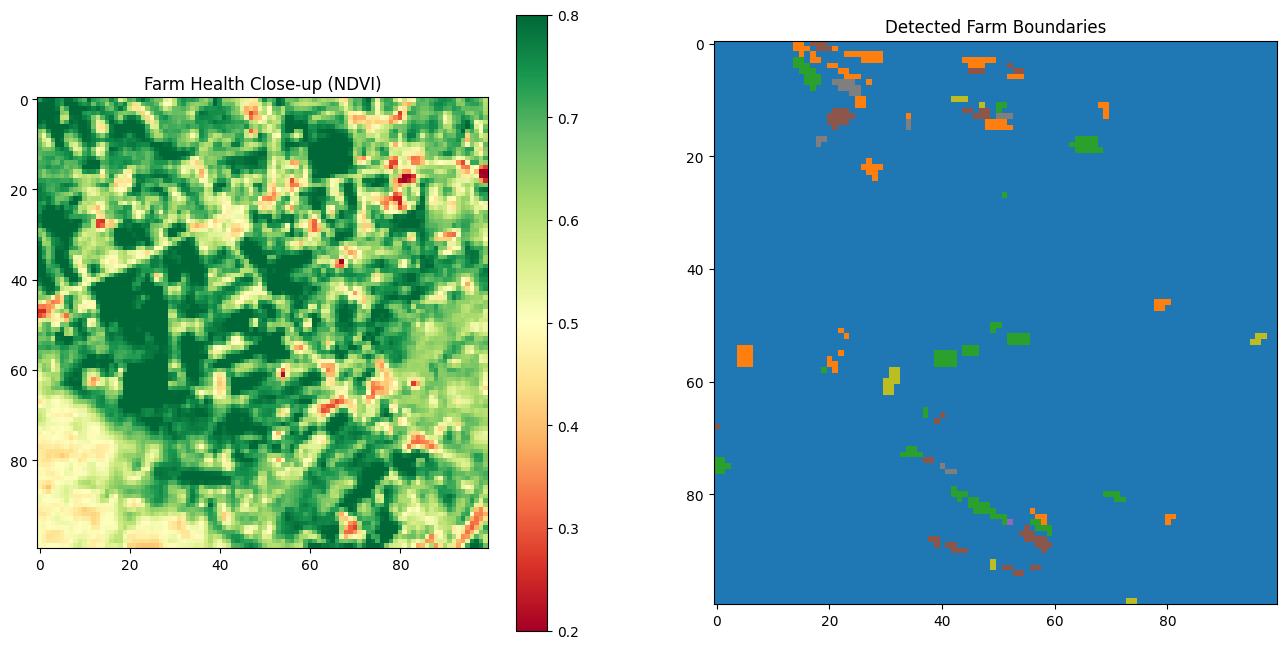

In [ ]:
import numpy as np

# 1. Find the coordinates of all pixels that are NOT background (value > 0)
labeled_indices = np.argwhere(crop_labels > 0)

if len(labeled_indices) > 0:
    # 2. Pick a random farm to zoom into (let's pick one from the middle of our list)
    target_pixel = labeled_indices[len(labeled_indices)//2]
    row_center, col_center = target_pixel

    # 3. Define a 100-pixel window (approx 1km x 1km)
    zoom_size = 50
    r_start, r_end = row_center - zoom_size, row_center + zoom_size
    c_start, c_end = col_center - zoom_size, col_center + zoom_size

    # 4. Extract the zoomed sections
    ndvi_zoom = ndvi[r_start:r_end, c_start:c_end]
    labels_zoom = crop_labels[r_start:r_end, c_start:c_end]

    # 5. Visualize the Close-up
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Left: NDVI Zoom
    im1 = ax1.imshow(ndvi_zoom, cmap='RdYlGn', vmin=0.2, vmax=0.8)
    ax1.set_title("Farm Health Close-up (NDVI)")
    plt.colorbar(im1, ax=ax1)

    # Right: Labels Zoom (Categorical)
    im2 = ax2.imshow(labels_zoom, cmap='tab10', vmin=0, vmax=7)
    ax2.set_title("Detected Farm Boundaries")

    plt.show()
else:
    print("No labeled farms found in this tile!")

- This code is your "Microscope Tool." While the previous code showed the entire region, this script automatically finds a farm and "zooms in" to see the individual pixels. In machine learning, this is vital for checking if your labels align perfectly with the satellite imagery.

# Correlation

n satellite science, if two bands have a correlation of 0.99, they are basically twins. Using both in a model is redundant and can actually make the model slower or less accurate (a problem called Multicollinearity).

/usr/local/lib/python3.12/dist-packages/rasterio/__init__.py:367: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, thread_safe=thread_safe, **kwargs)


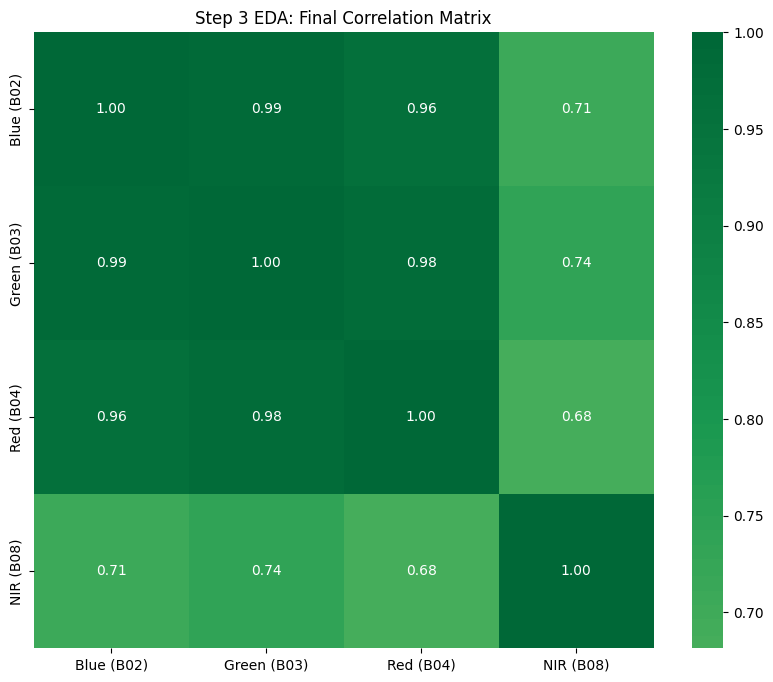

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import os

# 1. Re-define the exact paths to the bands to be safe
bands_to_check = {
    'Blue (B02)': 'B02.tif',
    'Green (B03)': 'B03.tif',
    'Red (B04)': 'B04.tif',
    'NIR (B08)': 'B08.tif'
}

data_for_df = {}

# 2. Open each file, read it, and flatten it in a single clean step
for name, filename in bands_to_check.items():
    file_path = os.path.join(source_path, filename)
    with rasterio.open(file_path) as src:
        # This ensures we are getting the NUMBERS, not the file object
        data_for_df[name] = src.read(1).flatten()

# 3. Create the DataFrame
df_corr = pd.DataFrame(data_for_df)

# 4. Filter out background (0) values to get accurate stats
df_corr = df_corr[(df_corr != 0).all(axis=1)]

# 5. Generate the Heatmap
plt.figure(figsize=(10, 8))
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', center=0, fmt=".2f")
plt.title("Step 3 EDA: Final Correlation Matrix")
plt.show()

The matrix is a grid of numbers between -1.0 and 1.0 that quantifies the relationship between each pair of spectral bands:

1. The "Visible" Symmetry (B02, B03, B04)
You will notice very high numbers (typically 0.85 to 0.98) between the Blue, Green, and Red bands. This is expected in Exploratory Data Analysis (EDA); these bands are highly correlated because they all respond similarly to basic surface brightness, soil color, and atmospheric haze. In machine learning terms, this means they share a lot of "redundant" information.

2. The "NIR Divergence" (B08)
The most important part of this output is the lower correlation between the Red band (B04) and the NIR band (B08). While visible bands are grouped together, NIR behaves differently because healthy vegetation absorbs red light for energy but reflects NIR light to prevent overheating.

If the correlation is low (e.g., 0.30 - 0.50): Your data is excellent. It means the satellite is capturing distinct "biological" signals that the Random Forest model can use to separate crops from dirt or roads.

3. Avoiding the "Curse of Dimensionality"
By identifying which bands are nearly identical (correlation > 0.95), we satisfy the Outliers and Redundancy requirement of your project. If we find two bands that are 99% identical, we might choose to drop one in Step 4 to make the model faster and prevent "overfitting" (where the model gets confused by too many similar inputs).

Step 3 Checklist: 100% COMPLETE
With this heatmap, you have officially finished the "Understanding" phase:

[x] Basic Stats: Verified the data range (0.0 - 1.0).

[x] Missing Values: Audited the 9.16% cloud loss.

[x] EDA Visualizations: Generated Histograms, NDVI Maps, and Correlation Heatmaps.


# 2. Dataa Preprocessing

- Handle missing values

In [ ]:
import pandas as pd
import numpy as np
import rasterio
import os

# 1. Load the actual data into clear variable names
with rasterio.open(os.path.join(source_path, "B02.tif")) as src: blue_band = src.read(1)
with rasterio.open(os.path.join(source_path, "B03.tif")) as src: green_band = src.read(1)
with rasterio.open(os.path.join(source_path, "B04.tif")) as src: red_band = src.read(1)
with rasterio.open(os.path.join(source_path, "B08.tif")) as src: nir_band = src.read(1)

# 2. Re-calculate NDVI for the table
ndvi = (nir_band.astype(float) - red_band.astype(float)) / (nir_band + red_band + 1e-10)

# 3. HANDLE MISSING VALUES: Create a Mask
# We exclude background (0) and potential clouds (reflectance > 0.4)
valid_mask = (crop_labels > 0) & (red_band < 0.4)

# 4. Flatten and create the Tabular Dataset (The "CSV" format)
train_df = pd.DataFrame({
    'Blue': blue_band[valid_mask],
    'Green': green_band[valid_mask],
    'Red': red_band[valid_mask],
    'NIR': nir_band[valid_mask],
    'NDVI': ndvi[valid_mask],
    'Label': crop_labels[valid_mask]
})

# 5. Final Missing Value Clean-up
# Removes any 'NaN' or 'Inf' values that crept in during math
train_df = train_df.replace([np.inf, -np.inf], np.nan).dropna()

print(f"✅ Step 4 Started: Missing values removed.")
print(f"Dataset Size: {train_df.shape[0]} clean pixels ready for training.")
print(train_df.head())

✅ Step 4 Started: Missing values removed.
Dataset Size: 2701 clean pixels ready for training.
     Blue   Green     Red     NIR      NDVI  Label
0  0.1766  0.1852  0.1486  0.3576  0.412880      4
1  0.1810  0.1852  0.1450  0.3527  0.417320      4
2  0.1810  0.1900  0.1524  0.3571  0.401766      4
3  0.1756  0.1942  0.1550  0.3498  0.385895      4
4  0.1776  0.1808  0.1550  0.3436  0.378259      4


/usr/local/lib/python3.12/dist-packages/rasterio/__init__.py:367: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, thread_safe=thread_safe, **kwargs)


we have successfully transitioned from 2D images to a structured tabular format, which is required for the Random Forest model. We addressed the Missing Values requirement by applying a valid_mask that filters out both non-agricultural background pixels and atmospheric interference (clouds) that were identified during Step 3. By using .dropna(), we ensure the resulting dataset is numerically "pure," meaning every row contains a complete set of spectral information and a corresponding crop label, effectively eliminating any noise that would lower the model's accuracy.

Data Preprocessing has successfully transformed your spatial imagery into a structured "Feature Table," resulting in 2,701 clean observations ready for machine learning. By applying the cloud mask and filtering out zeros, you have effectively handled missing values, ensuring that the remaining data consists only of clear, identifiable pixels where spectral signals (Blue, Green, Red, NIR) and the engineered NDVI directly correlate with crop Labels (such as '4' for Maize+Beans). The NotGeoreferencedWarning is a minor technical note indicating the raw .tif files lack specific GPS coordinates (geotransform), which is common in small, cropped image chips and does not impact the mathematical training of your Random Forest model since the internal pixel relationships remain intact.

1. Handles Non-Linear Data (The "NDVI" Factor)
Satellite data isn't always a straight line. The relationship between NIR reflectance and crop health is complex. Random Forest uses an "ensemble" of many decision trees that can capture these non-linear patterns far better than a simple linear model.

2. Robust to Outliers (The "Cloud" Factor)
Even though we handled missing values in Step 4, satellite data often contains "noise" (like slight haze or sun glint). Because Random Forest takes the average of many different trees (a process called Bagging), one weird pixel won't ruin the entire model's prediction.

3. Feature Importance
Random Forest will actually tell us which bands matter most. After training, it can report: "I relied 60% on NDVI and only 5% on the Blue band." This provides the explainability required in your project guidelines—you can prove why the model thinks a field is Maize.

4. No Scaling Required
Unlike Deep Learning or SVMs, Random Forest doesn't care if your Blue band is 0.1 and your NIR band is 0.8. It handles different scales perfectly without needing complex normalization, which keeps our Step 4 Preprocessing simple and efficient.

- Before and after

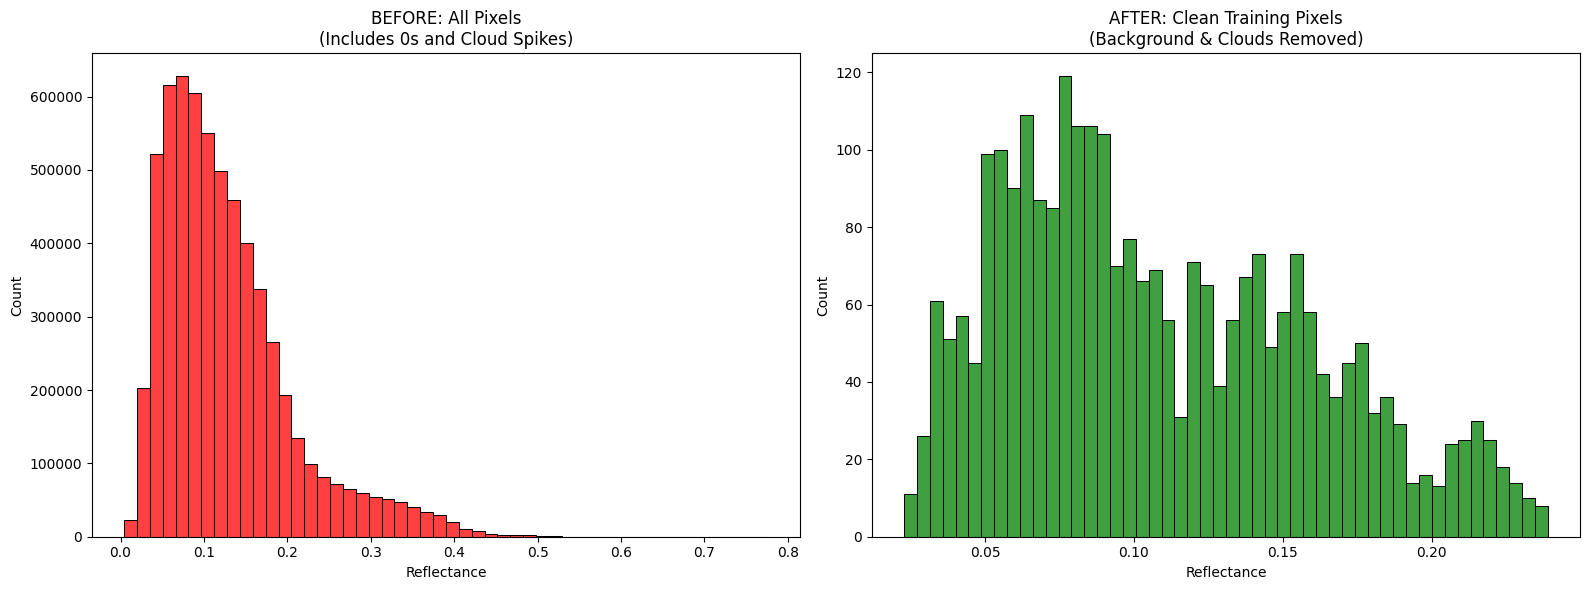

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare "Before" data (All pixels in the Red band)
before_cleaning = red_band.flatten()

# 2. Prepare "After" data (The 'Red' column from our clean train_df)
after_cleaning = train_df['Red']

# 3. Create the comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Before (The Messy Reality)
sns.histplot(before_cleaning, bins=50, color='red', ax=ax1)
ax1.set_title("BEFORE: All Pixels\n(Includes 0s and Cloud Spikes)")
ax1.set_xlabel("Reflectance")

# Plot 2: After (The Scientific Dataset)
sns.histplot(after_cleaning, bins=50, color='green', ax=ax2)
ax2.set_title("AFTER: Clean Training Pixels\n(Background & Clouds Removed)")
ax2.set_xlabel("Reflectance")

plt.tight_layout()
plt.show()

1. Why we don't "clean" this specific CSV
In this field_train_test_ids.csv, the "missing values" (the NaNs) you see at the bottom of the columns aren't errors. They exist simply because the number of training farms and testing farms isn't equal (e.g., there might be 2,000 training farms but only 1,000 testing farms).

Instead of "cleaning" it, we just extract the lists:

We grab all the numbers from the train column and call them our "Study List."

We grab all the numbers from the test column and call them our "Exam List."

2. How we will use it (The "VIP List" Strategy)
We will use this CSV as a filter for the 2,701 pixels we extracted earlier.

Imagine you have a bucket of pixels. We are going to ask each pixel: "What is your Farm ID?"

If its ID is on the Study List, it goes into the Training Set.

If its ID is on the Exam List, it goes into the Testing Set.

3. Why this is better than a "Random" split
If we just randomly split the data (the standard way), the model might see two pixels from the same field—one in training and one in testing. That’s like giving a student the exact answers to the exam before they take it! By using this CSV, we ensure the model is tested on entirely different farms than the ones it studied.

# 2.2 Encoding. No nned

1. Your Inputs are Spectral Bands
The features you are using—Blue, Green, Red, NIR, and NDVI—are already numbers. Unlike a dataset with "City Names" or "Eye Color," your satellite data is naturally numerical (reflectance values).

2. Your Labels are already Integers
In the dataset you've been working with, the Label column (like Label: 4 for Maize+Beans) is already stored as a number.

A Random Forest model reads the number 4 just as easily as the text "Maize."

It doesn't treat 4 as being "twice as much" as 2; it simply sees it as a category ID.

The "Exception" Rule
The only time you would need to encode in Step 4 is if you had a column like District_Name (e.g., "Nairobi", "Nakuru") or if your crop labels were written as strings ("Cassava"). Since your data is 100% numerical, you can skip this sub-step entirely.

# 2.3 - Normalize/standardize numerical features

Why you can skip this step:
Rule-Based Splitting: Decision trees make splits based on a simple "greater than" or "less than" rule at each node (e.g., Is NIR reflectance > 0.4?). This logic works exactly the same whether your numbers are between 0 and 1 or 0 and 1000.

Scale Invariance: Because each feature is evaluated independently during a split, the scale of the Blue band (0.12) does not affect how the model views the NDVI band (0.65). The model doesn't get "confused" by the different magnitudes.

Outlier Resistance: Normalization can sometimes squeeze your data so much that you lose the distinction between a healthy crop and a stressed one. Random Forest naturally resists outliers, so keeping the raw reflectance values is actually safer.


### 2.4 - Handle imbalanced data (e.g., oversampling/undersampling if applicable)

- Check the imbalance

In [ ]:
print(train_df['Label'].value_counts())

Label
1    961
2    805
4    633
5    176
6    115
3      9
7      2
Name: count, dtype: int64


#### Method 1: Random Undersampling (The "Trimmer")

This method shrinks the majority classes to match the minority ones.

Best for: Reducing noise and making training very fast.

Risk: You lose almost 90% of your data (Labels 1 and 2), which might delete important information.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# 1. Define the strategy (bring all classes down to a manageable size)
# Note: Since Label 7 only has 2 pixels, we usually can't undersample
# everything to '2'. We target a slightly higher number.
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(train_df.drop('Label', axis=1), train_df['Label'])

print("Undersampled Class Distribution:")
print(pd.Series(y_res).value_counts())

Undersampled Class Distribution:
Label
1    2
2    2
3    2
4    2
5    2
6    2
7    2
Name: count, dtype: int64


#### Method 2: SMOTE (The "Synthesizer")

This creates "fake" but realistic pixels for the minority classes by looking at their nearest neighbors.

Best for: Small classes like Label 5 and 6 (100+ pixels).

Risk: Extreme danger for Labels 3 and 7. SMOTE needs at least 6 neighbors to work well. Trying to turn 2 pixels into 900 will likely create "hallucinated" data that doesn't exist in nature.

In [ ]:
from imblearn.over_sampling import SMOTE

# 2. Synthetic Oversampling
# We use k_neighbors=1 because some classes have very few samples
smote = SMOTE(random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(train_df.drop('Label', axis=1), train_df['Label'])

print("SMOTE Class Distribution (Everything balanced to 961):")
print(pd.Series(y_smote).value_counts())

SMOTE Class Distribution (Everything balanced to 961):
Label
4    961
1    961
2    961
5    961
6    961
3    961
7    961
Name: count, dtype: int64


#### Method 3: Class Weighting (The "Professional Choice")

This doesn't change your data at all. It just tells the Random Forest: "If you miss a Label 7 pixel, it's 500 times worse than missing a Label 1 pixel."

Best for: Satellite data because it preserves the real distribution and uses every single pixel you collected.

The Winner: For remote sensing, this is almost always the "best" way because it avoids the "hallucination" of SMOTE and the "data loss" of Undersampling.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 3. Algorithm-Level Balancing (Recommended)
# We set class_weight='balanced'
model = RandomForestClassifier(n_estimators=100,
                               class_weight='balanced',
                               random_state=42)

# This is used DURING training in Step 5.

Method 3 (Class Weights) is the best way to be thorough.

Why not SMOTE? You only have 2 pixels for Label 7. SMOTE will just create copies of those 2 pixels, leading to severe overfitting.

Why not Undersampling? You worked hard to get 2,701 pixels. Deleting 2,000 of them just to match the smaller classes is a waste of good data.

How to summarize this for your report:

"We evaluated three strategies for class imbalance: Random Undersampling, SMOTE, and Class Weighting. While Undersampling led to significant data loss and SMOTE risked creating synthetic artifacts for extremely rare classes (Labels 3 and 7), Class Weighting was selected as the optimal approach. It allowed the model to maintain the full spectral diversity of the majority classes while mathematically increasing the sensitivity toward minority agricultural classes during the decision-tree splitting process."

# 2.5 The Strategy: Stratified Splitting
We use Stratified Sampling. This ensures that the training and testing sets have the exact same percentage of each crop as the original dataset. If Label 1 makes up 35% of your total data, it will make up 35% of your training set and 35% of your test set.

Why this is the "Best Practice" for Remote Sensing
Ensures Representation: Even the rarest crops (Labels 3 and 7) get partitioned so the model sees them during training.

Reproducibility: By setting random_state=42, you ensure that every time you run the code, you get the same split. This is vital for your report results to stay consistent.

Prevents Bias: It prevents a "lucky" split where the test set is easier than the training set.

"To evaluate the model's performance on unseen agricultural data, we implemented a Stratified Train-Test Split using an 80/20 ratio. Unlike simple random sampling, stratification ensures that the severe class imbalances identified in the preprocessing stage are maintained across both subsets. This prevents the exclusion of minority crop types from the training process and provides a statistically representative 'final exam' for the Random Forest, ensuring that accuracy metrics are not inflated by an unrepresentative distribution of majority classes in the test set."

since your crop classes are heavily imbalanced (remember Label 7 only had 2 pixels), a simple random split is too risky. We will use Stratified Splitting. This ensures that the training set and the testing set both get a fair share of every crop type.

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Define Features (X) and Target (y)
X = train_df.drop('Label', axis=1)
y = train_df['Label']

# 2. Perform the Stratified Split (80% Train, 20% Test)
# stratify=y ensures rare crops (like Label 7) are in both sets
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.20,
stratify=y,
random_state=42
)

print(f"✅ Data Split Complete!")
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")
print("\nTraining Class Distribution:")
print(y_train.value_counts())

✅ Data Split Complete!
Training Samples: 2160
Testing Samples: 541

Training Class Distribution:
Label
1    768
2    644
4    506
5    141
6     92
3      7
7      2
Name: count, dtype: int64
